# Santandar Classification

In [1]:
import numpy as np
import pandas as panda
from matplotlib import pyplot as plot
import seaborn as sns

import pandas as panda
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,label_binarize

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RepeatedStratifiedKFold,learning_curve

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, \
        classification_report,confusion_matrix,average_precision_score
from sklearn.linear_model import Perceptron, LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plot
from itertools import cycle
import numpy as np 
from scipy import interp
import seaborn as sns
import itertools, time, datetime
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import mutual_info_classif,f_classif
from numpy import bincount, linspace, mean, std, arange, squeeze

from keras.models import Sequential
from keras.layers import Dense, Activation, GaussianNoise,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
from keras import regularizers
import warnings

warnings.simplefilter('ignore')
%matplotlib inline


C:\Users\somak\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(143)

In [3]:
train_data = panda.read_csv('data/train.csv')


In [4]:
train_data.target.value_counts(), train_data.shape

(0    179902
 1     20098
 Name: target, dtype: int64, (200000, 202))

In [5]:
train_data['target'] = train_data.target.astype(np.int64)

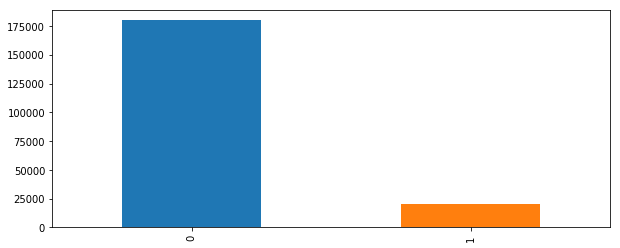

In [6]:
plot.figure(figsize=(10,4))
train_data.target.value_counts().plot(kind='bar')
plot.show()

In [7]:
train_data[[i for i in train_data.columns.tolist() if i not in ['target','id']]].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID_code,200000,200000,train_57178,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_0,200000,NaN,NaN,NaN,10.6799,3.04005,0.4084,8.45385,10.5248,12.7582,20.315
var_1,200000,NaN,NaN,NaN,-1.62762,4.05004,-15.0434,-4.74003,-1.60805,1.35862,10.3768
var_2,200000,NaN,NaN,NaN,10.7152,2.64089,2.1171,8.72247,10.58,12.5167,19.353
var_3,200000,NaN,NaN,NaN,6.79653,2.04332,-0.0402,5.25408,6.825,8.3241,13.1883
var_4,200000,NaN,NaN,NaN,11.0783,1.62315,5.0748,9.88317,11.1082,12.2611,16.6714
var_5,200000,NaN,NaN,NaN,-5.06532,7.86327,-32.5626,-11.2004,-4.83315,0.9248,17.2516
var_6,200000,NaN,NaN,NaN,5.40895,0.866607,2.3473,4.7677,5.3851,6.003,8.4477
var_7,200000,NaN,NaN,NaN,16.5458,3.41808,5.3497,13.9438,16.4568,19.1029,27.6918
var_8,200000,NaN,NaN,NaN,0.284162,3.33263,-10.5055,-2.3178,0.3937,2.9379,10.1513


In [8]:
data_type = train_data.dtypes.to_frame().reset_index()
data_type.columns  = ['col_name','col_type']
data_type[data_type.col_type==np.object].head()

,col_name,col_type
0,ID_code,object


In [9]:
train_data.isnull().any().sum()

0

In [10]:
col_names = [i for i in train_data.columns if i not in ['target','ID_code']]

In [11]:
def plot_variance_scree_plot(variance, cumulative_variance = None, title = 'Principal Component vs Explained Ratio', n_components = 14):
    with plot.style.context('seaborn-whitegrid'):
        plot.figure(figsize=(10, 5))

        plot.bar(range(1,n_components), variance, alpha=0.8, align='center',
                label='individual explained variance', color = 'teal') ## since there are 13 dimenison
        plot.step(range(1,n_components), cumulative_variance, where='mid',
                 label='cumulative explained variance', color ='red') if cumulative_variance is not None else None
        plot.plot(variance, color = 'black', label='scree')
        plot.ylabel('Explained variance ratio')
        plot.xlabel('Principal components')
        plot.legend(loc='best')
        plot.tight_layout()
        plot.title(title)
        plot.show()

In [12]:
x = train_data[col_names]
y = train_data.target

In [17]:
pca = PCA(n_components=10)
x_std = MinMaxScaler().fit_transform(x)
x_pca = pca.fit_transform(x_std)
explained_variance = pca.explained_variance_
explained_variance.shape, pca.components_.shape,x_pca.shape
# plot_variance_scree_plot(explained_variance)
# x_test_pca1 = pca.transform(x_test_std)

((10,), (10, 200), (200000, 10))

In [18]:
tot = sum(explained_variance)
var_exp = [(i / tot)*100 for i in sorted(explained_variance, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
tot, len(var_exp), cum_var_exp.shape

(0.2875648616201209, 10, (10,))

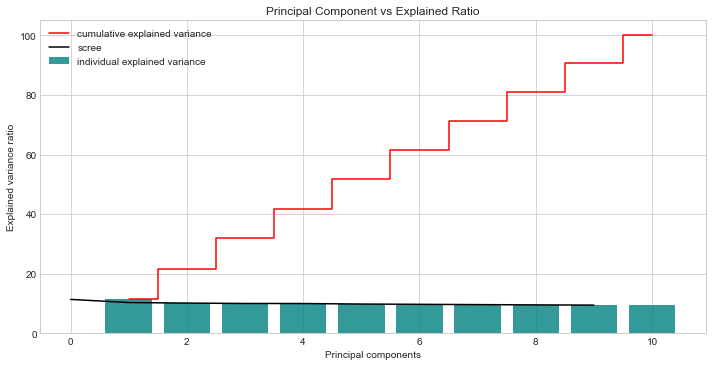

In [19]:
plot_variance_scree_plot(var_exp,cum_var_exp, n_components = pca.components_.shape[0] + 1)

In [20]:
lda = LinearDiscriminantAnalysis(n_components=10, solver='eigen',shrinkage='auto')
x_lda = lda.fit_transform(MinMaxScaler().fit_transform(x),y)
explained_variance = lda.explained_variance_ratio_
explained_variance.shape, x_lda.shape

((1,), (200000, 1))

### STEP 1: Run handful of usual suspect classifiers using selected 50 features giving highest coeff scores

<br><br>

In [21]:
class CodeTimer:
    
    """
        Utility custom contextual class for calculating the time 
        taken for a certain code block to execute
    
    """
    def __init__(self, name=None):
        self.name = " '"  + name + "'" if name else ''

    def __enter__(self):
        self.start = time.clock()

    def __exit__(self, exc_type, exc_value, traceback):
        self.took = (time.clock() - self.start) * 1000.0
        time_taken = datetime.timedelta(milliseconds = self.took)
        print('Code block' + self.name + ' took(HH:MM:SS): ' + str(time_taken))
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plot.ylabel('True label')
    plot.xlabel('Predicted label')
#     plot.tight_layout()
    plot.show()

In [22]:

def plotLearningCurve(_x_train, _y_train, learning_model_pipeline,  model_name, k_fold = 10, training_sample_sizes = linspace(0.1,1.0,10), jobsInParallel = 1):
    
    print('num of classes : ',np.bincount(_y_train))
    training_size, training_score, testing_score = learning_curve(estimator = learning_model_pipeline, \
                                                                X = _x_train, \
                                                                y = _y_train, \
                                                                train_sizes = training_sample_sizes, \
                                                                cv = k_fold, \
                                                                n_jobs = jobsInParallel) 


    training_mean = mean(training_score, axis = 1)
    training_std_deviation = std(training_score, axis = 1)
    testing_std_deviation = std(testing_score, axis = 1)
    testing_mean = mean(testing_score, axis = 1 )

    ## we have got the estimator in this case the perceptron running in 10 fold validation with 
    ## equal division of sizes betwwen .1 and 1. After execution, we get the number of training sizes used, 
    ## the training scores for those sizes and the test scores for those sizes. we will plot a scatter plot 
    ## to see the accuracy results and check for bias vs variance

    # training_size : essentially 10 sets of say a1, a2, a3,,...a10 sizes (this comes from train_size parameter, here we have given linespace for equal distribution betwwen 0.1 and 1 for 10 such values)
    # training_score : training score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    # testing_score : testing score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    ## the mean and std deviation for each are calculated simply to show ranges in the graph

    plot.plot(training_size, training_mean, label= "Training Data", marker= '+', color = 'blue', markersize = 8)
    plot.fill_between(training_size, training_mean+ training_std_deviation, training_mean-training_std_deviation, color='blue', alpha =0.12 )

    plot.plot(training_size, testing_mean, label= "Testing/Validation Data", marker= '*', color = 'green', markersize = 8)
    plot.fill_between(training_size, testing_mean+ training_std_deviation, testing_mean-training_std_deviation, color='green', alpha =0.14 )

    plot.title("Scoring of our training and testing data vs sample sizes for model:"+model_name)
    plot.xlabel("Number of Samples")
    plot.ylabel("Accuracy")
    plot.legend(loc= 'best')
    plot.show()
    
def plot_roc_auc_curve(false_positive_rate, true_positive_rate, model_name):
        
    plot.figure(figsize=(10,3))
    plot.plot(list(false_positive_rate), list(true_positive_rate),  label = "ROC Curve for model: "+model_name)     
    plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
    plot.plot([0, 0, 1], [0,1, 1], ':', label = 'Perfect Score')
    auc_score = auc(false_positive_rate, true_positive_rate)
    plot.title('ROC Curve for model: %s with AUC %.2f'%(model_name, auc_score))
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.legend(loc='best')
    plot.show()
    
    
def plot_precision_recall_curve(precision, recall, model_name):
    
    plot.figure(figsize=(10,3))
    plot.plot(list(recall), list(precision),  label = "Precision/Recall Curve for model: "+model_name)     
#     plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing') #
    plot.title('Precision Recall Curve for model: %s'%model_name)
    plot.xlabel('Recall')
    plot.ylabel('Precision')
    plot.legend(loc='best')
    plot.show()


    


In [23]:
def runGridSearchAndPredict(pipeline,model_name, x_train, y_train, x_test, y_test, param_grid, n_jobs = 1, cv = 10, score = 'accuracy'):
#     pass

    response =  {}
    training_timer       = CodeTimer('training')
    testing_timer        = CodeTimer('testing')
    learning_curve_timer = CodeTimer('learning_curve')
    predict_proba_timer  = CodeTimer('predict_proba')
    
    with training_timer:
        
        gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, n_jobs = n_jobs, scoring = score)

        search = gridsearch.fit(x_train,y_train)

        print("Grid Search Best parameters ", search.best_params_)
        print("Grid Search Best score ", search.best_score_)

    with testing_timer:
        y_prediction = gridsearch.predict(x_test)
            
    print("F1 score %s" %f1_score(y_test,y_prediction, average ='weighted'))
    print("Classification report  \n %s" %(classification_report(y_test, y_prediction)))
    
    with learning_curve_timer:
#         plotLearningCurve(x_train, y_train, search.best_estimator_, model_name, k_fold=cv)
#         _matrix = confusion_matrix(y_true = _y_test ,y_pred = y_prediction, labels = list(range(_y_test.shape[1])))
        _matrix = confusion_matrix(y_true = y_test ,y_pred = y_prediction, labels = list(set(y_test)))
        classes = list(set(y_test))
        plot_confusion_matrix(_matrix, classes, title = "Confusion matrix for model:"+model_name)
        
    with predict_proba_timer:

        if hasattr(gridsearch.best_estimator_, 'predict_proba'):
            
            print('inside decision function')
            y_probability = gridsearch.predict_proba(x_test)
            number_of_classes = len(np.unique(y_train))
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probability[:, 1])
            response['roc_auc_score'] = roc_auc_score(y_test, y_probability[:,1])
            response['roc_curve'] = (false_positive_rate, true_positive_rate)  
            response['roc_curve_false_positive_rate'] = false_positive_rate
            response['roc_curve_true_positive_rate'] = true_positive_rate
            precision, recall, _ = precision_recall_curve(y_test, y_probability[:,1])
            plot_roc_auc_curve(false_positive_rate, true_positive_rate, model_name)
            plot_precision_recall_curve(precision, recall, model_name)
            
        else: ## eg SVM, Perceptron doesnt have predict_proba method
            
            response['roc_auc_score'] = 0
            response['roc_curve'] = 0
            response['roc_curve_false_positive_rate'] = 0
            response['roc_curve_true_positive_rate'] = 0
    
    response['learning_curve_time'] = learning_curve_timer.took
    response['testing_time'] = testing_timer.took
    response['_y_prediction'] = y_prediction
#     response['accuracy_score'] = accuracy_score(y_test,y_prediction)
    response['training_time'] = training_timer.took
    response['f1_score']  = f1_score(y_test, y_prediction, average ='weighted')
    response['f1_score_micro']  = f1_score(y_test, y_prediction, average ='micro')
    response['f1_score_macro']  = f1_score(y_test, y_prediction, average ='macro')
    response['best_estimator'] = search.best_estimator_
    response['confusion_matrix'] = _matrix
    
    return response


def plotROCCurveAcrossModels(positive_rates_sequence, model_name):
    
    plot.figure(figsize=(10,5))
    for plot_values, label_name in zip(positive_rates_sequence, model_name):
        
        plot.plot(list(plot_values[0]), list(plot_values[1]),  label = "ROC Curve for model: "+label_name)
        
    plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing') #
    plot.title('ROC Curve across models')
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.legend(loc='best')
    plot.show()

In [24]:

def execute( _x_train,
             _y_train,
             _x_test,
             _y_test, 
            classifiers, 
            classifier_names, 
            classifier_param_grid,
            cv  = 10 , 
            score = 'accuracy',
            scaler = StandardScaler()
           ):
    
    '''
    This method will run your data sets against the model specified 
    Models will be fed through a pipeline where the first step would be to
    execute a scaling operation.
    
    Method will also call additional lower level methods in order to plot
    precision curve, roc curve, learning curve and will also prepare a confusion matrix
    
    :returns: dict containing execution metrics such as time taken, accuracy scores
    :returntype: dict
    
    '''

    timer = CodeTimer(name='overalltime')
    model_metrics = {}

    with timer:
        for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):

            pipeline_steps = [('scaler', scaler),(model_name, model)] if scaler is not None else [(model_name, model)]
            pipeline = Pipeline(pipeline_steps)

            result = runGridSearchAndPredict(pipeline, 
                                             model_name,
                                             _x_train,
                                             _y_train,
                                             _x_test,
                                             _y_test, 
                                             model_param_grid ,
                                             cv = cv,
                                             score = score)

            _y_prediction = result['_y_prediction']

            model_metrics[model_name] = {}
            model_metrics[model_name]['confusion_matrix'] = result.get('confusion_matrix')
            model_metrics[model_name]['training_time'] = result.get('training_time')
            model_metrics[model_name]['testing_time'] = result.get('testing_time')
            model_metrics[model_name]['learning_curve_time'] = result.get('learning_curve_time')
            model_metrics[model_name]['f1_score'] = result.get('f1_score')
            model_metrics[model_name]['f1_score_macro'] = result.get('f1_score_macro')
            model_metrics[model_name]['f1_score_micro'] = result.get('f1_score_micro')
            model_metrics[model_name]['roc_auc_score'] = result.get('roc_auc_score')
            model_metrics[model_name]['roc_curve_true_positive_rate'] = result.get('roc_curve_true_positive_rate')
            model_metrics[model_name]['roc_curve_false_positive_rate'] = result.get('roc_curve_false_positive_rate')

            model_metrics[model_name]['best_estimator'] = result.get('best_estimator')


    print(timer.took)
    
    return model_metrics


In [115]:
# input_shape = x_train.shape[1]

import keras.backend as K
from sklearn.metrics import roc_auc_score
def keras_roc_score(y_true, y_pred):
    return roc_auc_score(y_true,y_pred)

import tensorflow as tf
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
#     K.get_session().run(tf.local_variables_initializer())
    return auc
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

def prepare_classifier(noise_level = 0.01, input_shape = 1, dropout_rate = 0.2, l2_penalty = 0.02, l1_penalty= 0.01):
    
    kernel_regularizer = regularizers.l2(l2_penalty)
    activity_regularizer = regularizers.l1(l1_penalty)
    
    model = Sequential()
#     model.add(GaussianNoise(noise_level, input_shape = (input_shape,)))
    model.add(Dense(50, activation='relu', input_shape = (input_shape,),kernel_initializer= 'uniform', kernel_regularizer=kernel_regularizer, activity_regularizer = activity_regularizer))
#     model.add(GaussianNoise(noise_level))
#     model.add(Dropout(rate = dropout_rate))
    
    model.add(Dense(50, activation='relu',kernel_initializer= 'uniform', kernel_regularizer=kernel_regularizer, activity_regularizer = activity_regularizer))
#     model.add(Dropout(rate = dropout_rate))  
#     model.add(GaussianNoise(noise_level))              
    model.add(Dense(1, activation='relu'))
    

    optimizer = Adam(0.01)
#     optimizer = RMSprop(0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [auroc])
    
    return model


keras_classifier = KerasClassifier(build_fn = prepare_classifier, epochs=100, batch_size=10)

In [96]:
keras_classifier.get_params().keys()

dict_keys(['epochs', 'batch_size', 'build_fn'])

In [47]:

classifiers = [
#     Perceptron(random_state = 1),
    LogisticRegression(random_state = 1),
#     LogisticRegression(random_state = 1, solver='liblinear'),
#     LogisticRegression(random_state = 1, solver='newton-cg'),
#     LogisticRegression(random_state = 1, solver='sag'),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state = 1),
    KNeighborsClassifier(metric = 'minkowski'),
    RidgeClassifier(random_state = 123), 
#     SVC(kernel="linear"),
    SVC(),
    ExtraTreeClassifier(random_state = 123),
    GaussianProcessClassifier(random_state = 123),
    BernoulliNB(),
#     BaggingClassifier(base_estimator = LogisticRegression(random_state = 1)),
#     BaggingClassifier(base_estimator = BernoulliNB()),
#     GradientBoostingClassifier(random_state= 123),
#     LGBMClassifier(objective = 'binary'),
#     XGBClassifier(objective = 'binary:logistic')
#     keras_classifier
]


classifier_names = [
#             'perceptron',
            'logisticregression',
#             'logisticregression_liblinear_l2',
#             'logisticregression_newton_cg',
#             'logisticregression_sag',
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
            'ridge',
#             'linear_svc',
            'gamma_svc',
            'extra_trees',
            'gaussian_process',
            'bernoulli',
#             'bagging_logistic',
#             'bagging_bernoulli',
#             'gradient_boosting_classifier',
#             'lgbm_classifier',
#             'xgb'
#             'keras',
]

classifier_param_grid = [
            
#             {'perceptron__max_iter': [5,10,30], 'perceptron__eta0': [.1]},
            {
             'logisticregression__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
             'logisticregression__penalty':['l1','l2'],
             'logisticregression__solver':['saga','liblinear']
            },
#             {
#              'logisticregression_liblinear_l2__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
#              'logisticregression_liblinear_l2__penalty':['l2'],
#              'logisticregression_liblinear_l2__dual':[True]
#             },
#             {
#              'logisticregression_newton_cg__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
#              'logisticregression_newton_cg__penalty':['l2'],
#             },
#             {
#              'logisticregression_sag__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
#              'logisticregression_sag__penalty':['l2'],
#             },
    
            {'decisiontreeclassifier__max_depth':[6,8,10],
             'decisiontreeclassifier__criterion':['gini','entropy'],
             'decisiontreeclassifier__max_features':['auto','sqrt','log2'],
            },
            {'randomforestclassifier__n_estimators':[6,8,12],'randomforestclassifier__criterion': ['gini','entropy']} ,
            {'kneighborsclassifier__n_neighbors':[4,6,10]},
            {'ridge__alpha':[1,1.2,0.9],'ridge__max_iter':[100,300,500]},
#             {'linear_svc__C':[0.025]},
            {'gamma_svc__gamma':[2,4],'gamma_svc__C':[1,5]},
            {'extra_trees__max_depth':[6,8,12],'extra_trees__criterion': ['gini','entropy']} ,
            {'gaussian_process__max_iter_predict':[200,400]} ,
            {'bernoulli__alpha':[0.2,0.6,1.2]} ,
#             {'bagging_logistic__base_estimator__C':[1.2,0.02,2.2,4], 
#              'bagging_logistic__base_estimator__penalty':['l1','l2'],
#              'bagging_logistic__n_estimators': [5,8,10]
#             },
#             {'bagging_bernoulli__base_estimator__alpha':[1.2,0.02,2.2,4], 
#              'bagging_bernoulli__n_estimators': [5,8,10]
#             },
#             {
#                 'gradient_boosting_classifier__loss':['deviance','exponential'],
#                 'gradient_boosting_classifier__learning_rate':[0.5,1.2],
#                 'gradient_boosting_classifier__n_estimators':[100,500,1000],
#                 'gradient_boosting_classifier__criterion':['friedman_mse','mse','mae'],
#                 'gradient_boosting_classifier__max_depth':[6,8,16,20],
#             },
#             {
#                  'lgbm_classifier__num_leaves':[25,], \
#                  'lgbm_classifier__min_data_in_leaf':[100],\
#                  'lgbm_classifier__max_depth':[20,], \
#                  'lgbm_classifier__learning_rate' : [0.01,],\
#                  'lgbm_classifier__min_child_samples' :[2,], \
#                  'lgbm_classifier__n_estimators' : [5000,], \
#                  'lgbm_classifier__num_boost_round' : [10000], \
#                  'lgbm_classifier__feature_fraction' : [0.5,], \
#                  'lgbm_classifier__bagging_freq' : [1,], \
#                  'lgbm_classifier__bagging_seed' : [123], \
#                 'lgbm_classifier__boosting_type' : ['gbdt'], \
#                 'lgbm_classifier__min_sum_hessian_in_leaf' : [0.000446], \
#             },
#              {
#                 'xgb__max_depth':[6,8,10],
#                  'xgb__learning_rate':[0.1,0.5,1,2],
#                  'xgb__n_estimators':[100,400,1000],             
#                  'xgb__booster':['gbtree','dart'],
#                  'xgb__subsample':[0.5, 0.2,0.8]
#             },
    
#             {
#                 'keras__epochs':[600],
#                 'keras__batch_size':[1000],
#             }
]


In [26]:
# x = train_data[[i for i in train_data.columns.tolist() if i not in ['target','id']]]
# x = train_data[reqd_columns[:51]]
x = x_lda
y = train_data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y , stratify = y, test_size = 0.3, random_state = 123)

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from imblearn.combine import SMOTETomek

tl = TomekLinks(return_indices=True, ratio='majority')
_x_train_tomek, _y_train_tomek, id_tl = tl.fit_sample(x_train, y_train)

smt = SMOTETomek(ratio='auto')
_x_train_smt, _y_train_smt = smt.fit_sample(x_train, y_train)

smote = SMOTE(ratio='minority')
x_train_smote, y_train_smote = smote.fit_sample(x_train,y_train)

In [28]:
x_train_smote.shape, y_train_smote.shape, _x_train_tomek.shape, _y_train_tomek.shape

((251862, 1), (251862,), (133832, 1), (133832,))

In [29]:
np.bincount(y_train_smote)

array([125931, 125931], dtype=int64)

In [30]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state =123)
score= 'roc_auc'

Grid Search Best parameters  {'logisticregression__C': 1.2, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Grid Search Best score  0.8583103356420261
Code block 'training' took(HH:MM:SS): 0:02:05.402854
Code block 'testing' took(HH:MM:SS): 0:00:00.002896
F1 score 0.8176418720299653
Classification report  
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     53971
           1       0.28      0.77      0.41      6029

   micro avg       0.78      0.78      0.78     60000
   macro avg       0.62      0.78      0.64     60000
weighted avg       0.90      0.78      0.82     60000

Confusion matrix, without normalization
[[42007 11964]
 [ 1370  4659]]


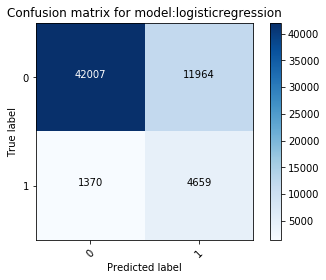

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.725340
inside decision function


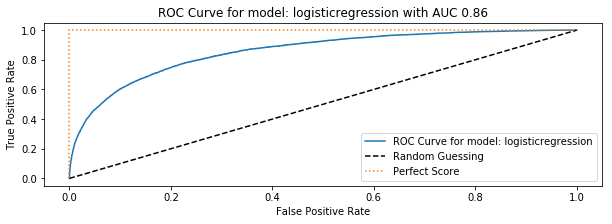

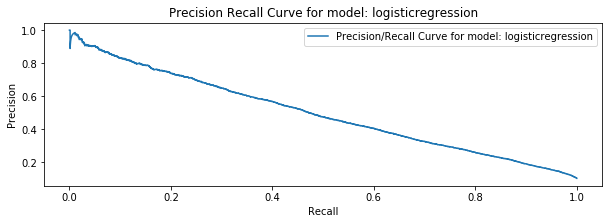

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.708361
Grid Search Best parameters  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': 'auto'}
Grid Search Best score  0.8607996689561457
Code block 'training' took(HH:MM:SS): 0:01:31.918882
Code block 'testing' took(HH:MM:SS): 0:00:00.015258
F1 score 0.8242943126702965
Classification report  
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     53971
           1       0.29      0.75      0.41      6029

   micro avg       0.79      0.79      0.79     60000
   macro avg       0.63      0.77      0.64     60000
weighted avg       0.90      0.79      0.82     60000

Confusion matrix, without normalization
[[42743 11228]
 [ 1528  4501]]


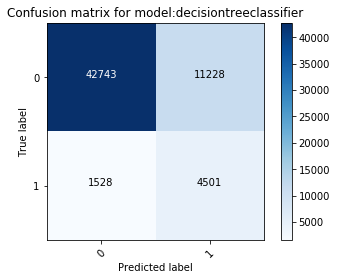

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.730179
inside decision function


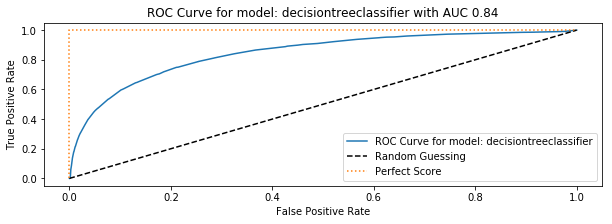

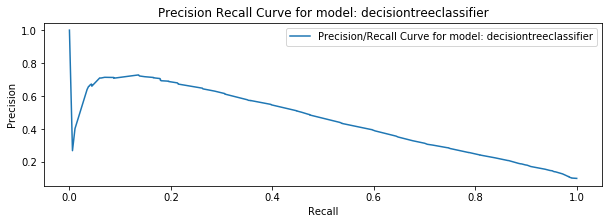

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.568681
Grid Search Best parameters  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 12}
Grid Search Best score  0.8266682107398402
Code block 'training' took(HH:MM:SS): 0:06:45.794392
Code block 'testing' took(HH:MM:SS): 0:00:00.519058
F1 score 0.7867596988265347
Classification report  
               precision    recall  f1-score   support

           0       0.94      0.76      0.84     53971
           1       0.21      0.59      0.31      6029

   micro avg       0.74      0.74      0.74     60000
   macro avg       0.58      0.67      0.58     60000
weighted avg       0.87      0.74      0.79     60000

Confusion matrix, without normalization
[[40859 13112]
 [ 2484  3545]]


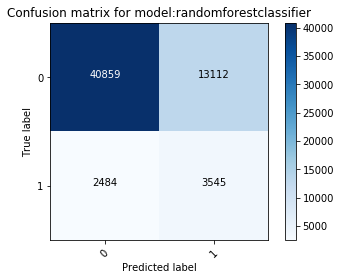

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.749908
inside decision function


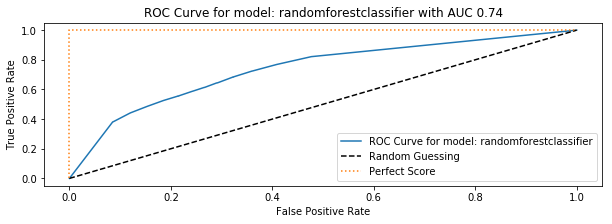

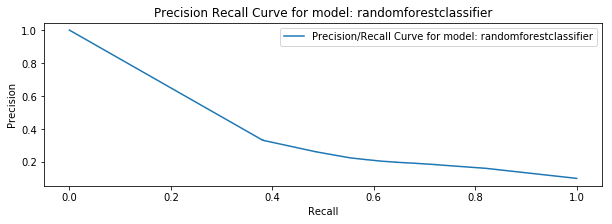

Code block 'predict_proba' took(HH:MM:SS): 0:00:01.055343
Grid Search Best parameters  {'kneighborsclassifier__n_neighbors': 10}
Grid Search Best score  0.87372536443189
Code block 'training' took(HH:MM:SS): 0:00:41.358462
Code block 'testing' took(HH:MM:SS): 0:00:00.388577
F1 score 0.8331927989797613
Classification report  
               precision    recall  f1-score   support

           0       0.95      0.82      0.88     53971
           1       0.28      0.64      0.39      6029

   micro avg       0.80      0.80      0.80     60000
   macro avg       0.62      0.73      0.64     60000
weighted avg       0.89      0.80      0.83     60000

Confusion matrix, without normalization
[[44338  9633]
 [ 2194  3835]]


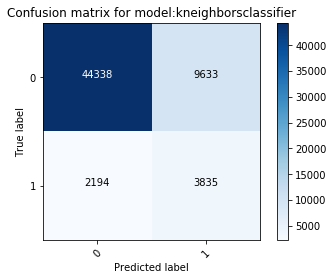

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.860492
inside decision function


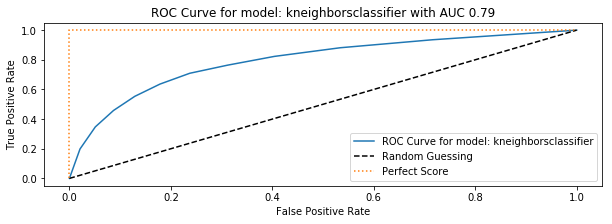

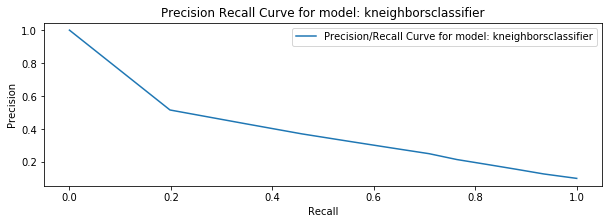

Code block 'predict_proba' took(HH:MM:SS): 0:00:00.942258
Grid Search Best parameters  {'ridge__alpha': 1, 'ridge__max_iter': 100}
Grid Search Best score  0.8583103356420261
Code block 'training' took(HH:MM:SS): 0:00:13.702633
Code block 'testing' took(HH:MM:SS): 0:00:00.002656
F1 score 0.8189185672811607
Classification report  
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     53971
           1       0.28      0.77      0.41      6029

   micro avg       0.78      0.78      0.78     60000
   macro avg       0.62      0.78      0.64     60000
weighted avg       0.90      0.78      0.82     60000

Confusion matrix, without normalization
[[42135 11836]
 [ 1390  4639]]


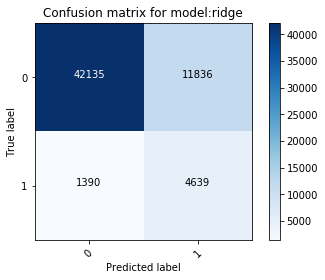

Code block 'learning_curve' took(HH:MM:SS): 0:00:00.730859
Code block 'predict_proba' took(HH:MM:SS): 0:00:00.000028


In [ ]:
response = execute(
        x_train_smote,
        y_train_smote,
        x_test,
        y_test,
        classifiers,
        classifier_names,
        classifier_param_grid,
        cv=cv,
        score=score,
        scaler= None)

In [33]:
results = panda.DataFrame(response).transpose()
results.head()
results[['f1_score',
         'f1_score_macro',
         'f1_score_micro',
         'learning_curve_time',
         'roc_auc_score',
         'testing_time',
         'training_time',
        ]]\
.sort_values(by=['roc_auc_score',],ascending=False)

,f1_score,f1_score_macro,f1_score_micro,learning_curve_time,roc_auc_score,testing_time,training_time
logisticregression,0.817642,0.637191,0.777767,747.346,0.856028,2.60893,151566
decisiontreeclassifier,0.824294,0.641945,0.7874,523.621,0.844872,9.82756,72960.1
kneighborsclassifier,0.833193,0.637858,0.802883,556.86,0.793904,348.128,32018.3
randomforestclassifier,0.78676,0.576131,0.740067,532.228,0.738028,427.729,315332
ridge,0.818919,0.638313,0.779567,567.979,0,2.40242,10015.7


In [41]:
best_estimator = response.get('logisticregression').get('best_estimator')

In [ ]:

roc_rates = []
model_name = []
for index, key in enumerate(response):
    
    
    estimator = response.get(key)
    if estimator.get('roc_auc_score')!=0:
        roc_curve_true_positive_rate = estimator.get('roc_curve_true_positive_rate')
        roc_curve_false_positive_rate = estimator.get('roc_curve_false_positive_rate')
        roc_rates.append([roc_curve_false_positive_rate,roc_curve_true_positive_rate])
        model_name.append(key)

plotROCCurveAcrossModels(roc_rates,model_name) 



In [ ]:
results['learning_curve_time'] = results['learning_curve_time'].astype('float64')
results['testing_time'] = results['testing_time'].astype('float64')
results['training_time'] = results['training_time'].astype('float64')
results['f1_score'] = results['f1_score'].astype('float64')
results['f1_score_micro'] = results['f1_score_micro'].astype('float64')
results['f1_score_macro'] = results['f1_score_macro'].astype('float64')
results['roc_auc_score'] = results['roc_auc_score'].astype('float64')
# results['roc_auc_macro'] = results['roc_auc_macro'].astype('float64')

#scaling time parameters between 0 and 1
results['learning_curve_time'] = (results['learning_curve_time']- results['learning_curve_time'].min())/(results['learning_curve_time'].max()- results['learning_curve_time'].min())
results['testing_time'] = (results['testing_time']- results['testing_time'].min())/(results['testing_time'].max()- results['testing_time'].min())
results['training_time'] = (results['training_time']- results['training_time'].min())/(results['training_time'].max()- results['training_time'].min())

results.plot(kind='barh',figsize=(12, 10))
plot.title("Scaled Estimates across different classifiers used")
plot.show()

### Conclusion:

1. We got highest scores of ROC/AUC 0.92 in logistic regression with l2 parameter

2. From the learning curve, we also see that overfitting tendency is less


In [35]:
test_data = panda.read_csv('data/test.csv')


test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [42]:
# test_x = lda.transform(test_data[[i for i in test_data.columns.tolist() if i not in ['ID_code']]])
test_x=test_data[[i for i in test_data.columns.tolist() if i not in ['ID_code']]]
test_x.shape
test_x=lda.transform(MinMaxScaler().fit_transform(test_x))

In [43]:
test_target = best_estimator.predict(test_x)

In [44]:
np.bincount(test_target)

array([147011,  52989], dtype=int64)

In [45]:
submission = panda.read_csv('data/sample_submission.csv')
submission['target'] = test_target
submission.head()

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,0
3,test_3,1
4,test_4,0


In [46]:
submission.to_csv('sample_submission_3.csv',index=False)